In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Checking if we are using google colab or local machine and configuring 
# imports accordingly
import os
google_colab = input('Running on Colab?\n')
if google_colab == 'yes' : 
    BASE_DIR = 'University/UC3M/TFM/cnp_repo/neural-processes'

    # Load the Drive helper and mount
    from google.colab import drive

    # This will prompt for authorization.
    drive.mount('/content/drive')

      # Change to assignment directory ('Lab_Exercises_DASS/Lab_Exercise4' by default)
    import os
    os.chdir(f'/content/drive/My Drive/{BASE_DIR}')
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')
    os.chdir(BASE_DIR)

    
# custom imports
from cnp.trainer import RegressionTrainer
from cnp.datageneration import DataGenerator
from cnp.helpers import Helper
from cnp.cnp import RegressionCNP
from cnp.run_experiment import run_experiment

import torch
import numpy as np
from copy import copy

# import utils
import json
from datetime import date

Running on Colab?
yes
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
if google_colab=='yes':
    config_dir = 'base_configs'
else:
    config_dir = os.path.join(BASE_DIR,'base_configs')

# checkin the parameters
# loading the base config file for this experiment
with open(os.path.join(config_dir,'polynomial_regression_config.json')) as f:
    file = f.read()
    base_config = json.loads(file)
base_config

{'cnp_params': {'aggregation_kwargs': {'aggregator': None,
   'simple_aggregator_type': 'mean'},
  'dimout': 2,
  'dimr': 128,
  'dimx': 1,
  'dimy': 1,
  'dropout': 0.2,
  'max_contx': 10,
  'max_funcs': 10,
  'min_contx': 3,
  'min_funcs': 2,
  'num_layers_decoder': 3,
  'num_layers_encoder': 4,
  'num_neurons_decoder': 128,
  'num_neurons_encoder': 128},
 'data_kwargs': {'datagenerator': 'cnp.datageneration.PolynomialRegression',
  'init_kwargs': {'range_x': [-2, 2], 'steps': 400, 'xdim': 1},
  'max_coef': 1,
  'min_coef': -1,
  'mu_gen': 0,
  'mu_noise': 0,
  'num_instances_test': 100,
  'num_instances_train': 64,
  'num_instances_vali': 10,
  'sigma_gen': 1,
  'sigma_noise': 0.04},
 'experiment_params': {'lr': 0.001,
  'n_epochs': 200000,
  'seed': 1,
  'train_on_gpu': False},
 'train_kwargs': {'batch_size_test': 10,
  'batch_size_train': 64,
  'batch_size_vali': 10,
  'plot_mode': None,
  'plot_progress': True,
  'print_after': 2000}}

In [4]:
# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    base_config['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    base_config['experiment_params']['train_on_gpu'] = False

Training on GPU!


In [5]:
base_config['cnp_params']['dimx'] = 5
base_config['data_kwargs']['init_kwargs']['xdim'] = 5

## Simple Mean Experiment 

In [6]:
mean_exp_config = copy(base_config)

In [ ]:
run_experiment(config_file=mean_exp_config,
               experiment_name='5d_polynomial_mean',
              google_colab=google_colab)

Training on GPU!
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=133, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=6, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=128, out_features=128, bias=True)
  )
)
Aggregation using mean operation


  0%|          | 5/200000 [00:00<22:07:39,  2.51it/s]

Mean training loss at epoch 0 :                         26.129
Mean Validation loss after 0 equals                     30.771



  1%|          | 2008/200000 [00:51<1:27:04, 37.89it/s]

Mean training loss at epoch 2000 :                         2.547
Mean Validation loss after 2000 equals                     2.518



  2%|▏         | 4005/200000 [01:42<1:25:58, 37.99it/s]

Mean training loss at epoch 4000 :                         2.474
Mean Validation loss after 4000 equals                     2.61



  3%|▎         | 6009/200000 [02:34<1:21:02, 39.90it/s]

Mean training loss at epoch 6000 :                         2.409
Mean Validation loss after 6000 equals                     2.642



  4%|▍         | 8006/200000 [03:24<1:20:05, 39.96it/s]

Mean training loss at epoch 8000 :                         2.295
Mean Validation loss after 8000 equals                     2.492



  5%|▌         | 10005/200000 [04:14<1:21:19, 38.93it/s]

Mean training loss at epoch 10000 :                         2.381
Mean Validation loss after 10000 equals                     2.336



  6%|▌         | 12006/200000 [05:04<1:19:15, 39.53it/s]

Mean training loss at epoch 12000 :                         2.255
Mean Validation loss after 12000 equals                     2.454



  7%|▋         | 14007/200000 [05:55<1:20:20, 38.58it/s]

Mean training loss at epoch 14000 :                         2.126
Mean Validation loss after 14000 equals                     2.425



  8%|▊         | 16007/200000 [06:46<1:18:10, 39.23it/s]

Mean training loss at epoch 16000 :                         2.162
Mean Validation loss after 16000 equals                     2.318



  9%|▉         | 18008/200000 [07:37<1:18:13, 38.77it/s]

Mean training loss at epoch 18000 :                         2.15
Mean Validation loss after 18000 equals                     2.276



 10%|█         | 20006/200000 [08:27<1:16:23, 39.27it/s]

Mean training loss at epoch 20000 :                         2.243
Mean Validation loss after 20000 equals                     2.372



 11%|█         | 22004/200000 [09:18<1:14:51, 39.63it/s]

Mean training loss at epoch 22000 :                         2.171
Mean Validation loss after 22000 equals                     2.336



 12%|█▏        | 24009/200000 [10:08<1:14:58, 39.12it/s]

Mean training loss at epoch 24000 :                         2.161
Mean Validation loss after 24000 equals                     2.238



 13%|█▎        | 26006/200000 [10:58<1:12:49, 39.82it/s]

Mean training loss at epoch 26000 :                         1.917
Mean Validation loss after 26000 equals                     2.256



 14%|█▍        | 28006/200000 [11:49<1:11:55, 39.85it/s]

Mean training loss at epoch 28000 :                         2.131
Mean Validation loss after 28000 equals                     2.293



 15%|█▌        | 30005/200000 [12:40<1:15:17, 37.63it/s]

Mean training loss at epoch 30000 :                         2.134
Mean Validation loss after 30000 equals                     2.45



 16%|█▌        | 32006/200000 [13:31<1:11:03, 39.40it/s]

Mean training loss at epoch 32000 :                         2.106
Mean Validation loss after 32000 equals                     2.288



 17%|█▋        | 34005/200000 [14:22<1:11:17, 38.80it/s]

Mean training loss at epoch 34000 :                         2.005
Mean Validation loss after 34000 equals                     2.294



 18%|█▊        | 36005/200000 [15:13<1:11:03, 38.46it/s]

Mean training loss at epoch 36000 :                         2.089
Mean Validation loss after 36000 equals                     2.235



 19%|█▉        | 38006/200000 [16:04<1:07:11, 40.18it/s]

Mean training loss at epoch 38000 :                         2.255
Mean Validation loss after 38000 equals                     2.32



 20%|██        | 40005/200000 [16:54<1:08:16, 39.05it/s]

Mean training loss at epoch 40000 :                         1.897
Mean Validation loss after 40000 equals                     2.223



 21%|██        | 42007/200000 [17:46<1:10:23, 37.41it/s]

Mean training loss at epoch 42000 :                         2.209
Mean Validation loss after 42000 equals                     2.356



 22%|██▏       | 44007/200000 [18:36<1:06:36, 39.03it/s]

Mean training loss at epoch 44000 :                         2.008
Mean Validation loss after 44000 equals                     2.195



 23%|██▎       | 46005/200000 [19:28<1:05:06, 39.43it/s]

Mean training loss at epoch 46000 :                         1.945
Mean Validation loss after 46000 equals                     2.109



 24%|██▍       | 48008/200000 [20:19<1:06:19, 38.20it/s]

Mean training loss at epoch 48000 :                         2.021
Mean Validation loss after 48000 equals                     2.251



 25%|██▌       | 50005/200000 [21:09<1:03:57, 39.09it/s]

Mean training loss at epoch 50000 :                         2.221
Mean Validation loss after 50000 equals                     2.243



 26%|██▌       | 52009/200000 [22:00<1:02:02, 39.75it/s]

Mean training loss at epoch 52000 :                         2.276
Mean Validation loss after 52000 equals                     2.416



 27%|██▋       | 54005/200000 [22:51<1:04:21, 37.81it/s]

Mean training loss at epoch 54000 :                         2.224
Mean Validation loss after 54000 equals                     2.283



 28%|██▊       | 56009/200000 [23:42<59:43, 40.18it/s]

Mean training loss at epoch 56000 :                         1.841
Mean Validation loss after 56000 equals                     2.182



 29%|██▉       | 58008/200000 [24:33<59:31, 39.76it/s]

Mean training loss at epoch 58000 :                         2.124
Mean Validation loss after 58000 equals                     2.131



 30%|███       | 60004/200000 [25:24<59:19, 39.33it/s]

Mean training loss at epoch 60000 :                         2.058
Mean Validation loss after 60000 equals                     2.43



 31%|███       | 62004/200000 [26:14<57:56, 39.69it/s]

Mean training loss at epoch 62000 :                         2.084
Mean Validation loss after 62000 equals                     2.189



 32%|███▏      | 64005/200000 [27:05<58:08, 38.98it/s]

Mean training loss at epoch 64000 :                         1.88
Mean Validation loss after 64000 equals                     2.222



 33%|███▎      | 66007/200000 [27:56<1:00:20, 37.01it/s]

Mean training loss at epoch 66000 :                         1.912
Mean Validation loss after 66000 equals                     2.25



 34%|███▍      | 68009/200000 [28:46<55:34, 39.58it/s]

Mean training loss at epoch 68000 :                         1.959
Mean Validation loss after 68000 equals                     2.173



 35%|███▌      | 70008/200000 [29:37<54:36, 39.67it/s]

Mean training loss at epoch 70000 :                         2.031
Mean Validation loss after 70000 equals                     2.399



 36%|███▌      | 72006/200000 [30:27<54:43, 38.98it/s]

Mean training loss at epoch 72000 :                         1.851
Mean Validation loss after 72000 equals                     2.377



 37%|███▋      | 74008/200000 [31:18<53:20, 39.37it/s]

Mean training loss at epoch 74000 :                         1.966
Mean Validation loss after 74000 equals                     2.327



 38%|███▊      | 76004/200000 [32:09<53:56, 38.31it/s]

Mean training loss at epoch 76000 :                         1.983
Mean Validation loss after 76000 equals                     2.267



 39%|███▉      | 78008/200000 [33:00<55:05, 36.90it/s]

Mean training loss at epoch 78000 :                         1.849
Mean Validation loss after 78000 equals                     2.276



 40%|████      | 80007/200000 [33:51<52:22, 38.18it/s]

Mean training loss at epoch 80000 :                         2.073
Mean Validation loss after 80000 equals                     2.244



 41%|████      | 82006/200000 [34:43<53:04, 37.05it/s]

Mean training loss at epoch 82000 :                         2.025
Mean Validation loss after 82000 equals                     2.409



 42%|████▏     | 84006/200000 [35:34<48:45, 39.64it/s]

Mean training loss at epoch 84000 :                         1.874
Mean Validation loss after 84000 equals                     2.299



 43%|████▎     | 86007/200000 [36:26<51:16, 37.06it/s]

Mean training loss at epoch 86000 :                         1.879
Mean Validation loss after 86000 equals                     2.338



 44%|████▍     | 88007/200000 [37:19<50:04, 37.27it/s]

Mean training loss at epoch 88000 :                         1.841
Mean Validation loss after 88000 equals                     2.154



 45%|████▌     | 90005/200000 [38:12<50:53, 36.02it/s]

Mean training loss at epoch 90000 :                         2.118
Mean Validation loss after 90000 equals                     2.321



 46%|████▌     | 92009/200000 [39:06<44:57, 40.03it/s]

Mean training loss at epoch 92000 :                         1.824
Mean Validation loss after 92000 equals                     2.574



 47%|████▋     | 94008/200000 [40:00<47:55, 36.86it/s]

Mean training loss at epoch 94000 :                         2.076
Mean Validation loss after 94000 equals                     2.169



 48%|████▊     | 96007/200000 [40:56<49:12, 35.22it/s]

Mean training loss at epoch 96000 :                         2.005
Mean Validation loss after 96000 equals                     2.333



 49%|████▉     | 98005/200000 [41:50<46:40, 36.42it/s]

Mean training loss at epoch 98000 :                         1.967
Mean Validation loss after 98000 equals                     2.278



 50%|█████     | 100007/200000 [42:45<44:19, 37.60it/s]

Mean training loss at epoch 100000 :                         2.07
Mean Validation loss after 100000 equals                     2.522



 51%|█████     | 102005/200000 [43:39<45:23, 35.99it/s]

Mean training loss at epoch 102000 :                         1.771
Mean Validation loss after 102000 equals                     2.198



 52%|█████▏    | 104005/200000 [44:33<44:12, 36.19it/s]

Mean training loss at epoch 104000 :                         1.957
Mean Validation loss after 104000 equals                     2.347



 53%|█████▎    | 106007/200000 [45:26<39:33, 39.60it/s]

Mean training loss at epoch 106000 :                         2.197
Mean Validation loss after 106000 equals                     2.179



 54%|█████▍    | 108008/200000 [46:20<37:32, 40.84it/s]

Mean training loss at epoch 108000 :                         2.019
Mean Validation loss after 108000 equals                     2.231



 55%|█████▌    | 110007/200000 [47:10<39:13, 38.24it/s]

Mean training loss at epoch 110000 :                         1.893
Mean Validation loss after 110000 equals                     2.477



 56%|█████▌    | 112007/200000 [48:01<37:40, 38.92it/s]

Mean training loss at epoch 112000 :                         2.011
Mean Validation loss after 112000 equals                     2.446



 57%|█████▋    | 114005/200000 [48:51<35:15, 40.65it/s]

Mean training loss at epoch 114000 :                         1.912
Mean Validation loss after 114000 equals                     2.276



 58%|█████▊    | 116005/200000 [49:41<36:48, 38.03it/s]

Mean training loss at epoch 116000 :                         1.974
Mean Validation loss after 116000 equals                     2.264



 59%|█████▉    | 118008/200000 [50:31<33:41, 40.57it/s]

Mean training loss at epoch 118000 :                         1.964
Mean Validation loss after 118000 equals                     2.262



 60%|██████    | 120008/200000 [51:20<32:47, 40.66it/s]

Mean training loss at epoch 120000 :                         2.091
Mean Validation loss after 120000 equals                     2.459



 61%|██████    | 122007/200000 [52:10<32:58, 39.42it/s]

Mean training loss at epoch 122000 :                         1.901
Mean Validation loss after 122000 equals                     2.409



 62%|██████▏   | 124006/200000 [52:59<31:10, 40.62it/s]

Mean training loss at epoch 124000 :                         1.99
Mean Validation loss after 124000 equals                     2.453



 63%|██████▎   | 126005/200000 [53:50<30:34, 40.34it/s]

Mean training loss at epoch 126000 :                         2.0
Mean Validation loss after 126000 equals                     2.093



 64%|██████▍   | 128006/200000 [54:40<30:20, 39.55it/s]

Mean training loss at epoch 128000 :                         1.939
Mean Validation loss after 128000 equals                     2.23



 65%|██████▌   | 130005/200000 [55:29<29:30, 39.52it/s]

Mean training loss at epoch 130000 :                         1.915
Mean Validation loss after 130000 equals                     2.304



 65%|██████▌   | 130058/200000 [55:31<28:59, 40.22it/s]

## Max Experiment 

In [ ]:
max_exp_config = copy(base_config)

In [ ]:
max_exp_config['cnp_params']['aggregation_kwargs']['simple_aggregator_type']='max'


In [ ]:
run_experiment(config_file=max_exp_config,
               experiment_name='10d_gp_max',
              google_colab=google_colab)

  0%|          | 4/100000 [00:00<42:39, 39.07it/s]

Training on GPU!
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=133, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=6, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=128, out_features=128, bias=True)
  )
)
Aggregation using max operation
Mean training loss at epoch 0 :                         1.524
Mean Validation loss after 0 equals                     1.556



  1%|          | 506/100000 [00:12<40:32, 40.90it/s]

Mean training loss at epoch 500 :                         1.153
Mean Validation loss after 500 equals                     1.622



  1%|          | 1006/100000 [00:23<39:21, 41.92it/s]

Mean training loss at epoch 1000 :                         1.322
Mean Validation loss after 1000 equals                     1.503



  2%|▏         | 1506/100000 [00:35<40:08, 40.89it/s]

Mean training loss at epoch 1500 :                         1.478
Mean Validation loss after 1500 equals                     1.584



  2%|▏         | 2006/100000 [00:47<38:16, 42.67it/s]

Mean training loss at epoch 2000 :                         1.736
Mean Validation loss after 2000 equals                     1.575



  3%|▎         | 2506/100000 [00:59<39:06, 41.55it/s]

Mean training loss at epoch 2500 :                         1.164
Mean Validation loss after 2500 equals                     1.623



  3%|▎         | 3006/100000 [01:10<37:37, 42.97it/s]

Mean training loss at epoch 3000 :                         1.398
Mean Validation loss after 3000 equals                     1.685



  4%|▎         | 3506/100000 [01:22<37:40, 42.70it/s]

Mean training loss at epoch 3500 :                         1.509
Mean Validation loss after 3500 equals                     1.872



  4%|▍         | 4006/100000 [01:34<37:30, 42.66it/s]

Mean training loss at epoch 4000 :                         1.117
Mean Validation loss after 4000 equals                     1.749



  5%|▍         | 4506/100000 [01:45<36:56, 43.08it/s]

Mean training loss at epoch 4500 :                         0.498
Mean Validation loss after 4500 equals                     1.799



  5%|▌         | 5006/100000 [01:57<36:58, 42.81it/s]

Mean training loss at epoch 5000 :                         0.648
Mean Validation loss after 5000 equals                     2.083



  6%|▌         | 5506/100000 [02:08<37:05, 42.46it/s]

Mean training loss at epoch 5500 :                         1.242
Mean Validation loss after 5500 equals                     2.072



  6%|▌         | 6006/100000 [02:20<36:52, 42.48it/s]

Mean training loss at epoch 6000 :                         1.375
Mean Validation loss after 6000 equals                     1.981



  7%|▋         | 6506/100000 [02:32<36:54, 42.21it/s]

Mean training loss at epoch 6500 :                         1.162
Mean Validation loss after 6500 equals                     1.821



  7%|▋         | 7008/100000 [02:44<36:21, 42.63it/s]

Mean training loss at epoch 7000 :                         1.344
Mean Validation loss after 7000 equals                     1.857



  8%|▊         | 7508/100000 [02:56<36:13, 42.55it/s]

Mean training loss at epoch 7500 :                         0.962
Mean Validation loss after 7500 equals                     1.912



  8%|▊         | 8008/100000 [03:07<36:37, 41.86it/s]

Mean training loss at epoch 8000 :                         1.292
Mean Validation loss after 8000 equals                     2.228



  9%|▊         | 8508/100000 [03:19<36:08, 42.20it/s]

Mean training loss at epoch 8500 :                         0.378
Mean Validation loss after 8500 equals                     2.288



  9%|▉         | 9008/100000 [03:31<36:40, 41.36it/s]

Mean training loss at epoch 9000 :                         0.184
Mean Validation loss after 9000 equals                     2.128



 10%|▉         | 9508/100000 [03:43<36:13, 41.63it/s]

Mean training loss at epoch 9500 :                         1.666
Mean Validation loss after 9500 equals                     2.075



 10%|█         | 10008/100000 [03:55<37:24, 40.09it/s]

Mean training loss at epoch 10000 :                         0.841
Mean Validation loss after 10000 equals                     1.918



 11%|█         | 10508/100000 [04:07<35:20, 42.19it/s]

Mean training loss at epoch 10500 :                         0.346
Mean Validation loss after 10500 equals                     2.292



 11%|█         | 11008/100000 [04:18<34:45, 42.68it/s]

Mean training loss at epoch 11000 :                         0.46
Mean Validation loss after 11000 equals                     1.906



 12%|█▏        | 11508/100000 [04:30<36:06, 40.85it/s]

Mean training loss at epoch 11500 :                         0.308
Mean Validation loss after 11500 equals                     1.756



 12%|█▏        | 12008/100000 [04:42<35:16, 41.58it/s]

Mean training loss at epoch 12000 :                         1.174
Mean Validation loss after 12000 equals                     1.921



 13%|█▎        | 12508/100000 [04:54<34:45, 41.95it/s]

Mean training loss at epoch 12500 :                         0.946
Mean Validation loss after 12500 equals                     2.099



 13%|█▎        | 13008/100000 [05:06<34:42, 41.77it/s]

Mean training loss at epoch 13000 :                         0.847
Mean Validation loss after 13000 equals                     2.094



 14%|█▎        | 13508/100000 [05:18<34:49, 41.39it/s]

Mean training loss at epoch 13500 :                         1.151
Mean Validation loss after 13500 equals                     1.924



 14%|█▍        | 14008/100000 [05:29<34:05, 42.05it/s]

Mean training loss at epoch 14000 :                         0.52
Mean Validation loss after 14000 equals                     1.813



 15%|█▍        | 14508/100000 [05:41<34:17, 41.56it/s]

Mean training loss at epoch 14500 :                         0.257
Mean Validation loss after 14500 equals                     1.766



 15%|█▌        | 15008/100000 [05:53<33:11, 42.68it/s]

Mean training loss at epoch 15000 :                         0.693
Mean Validation loss after 15000 equals                     2.77



 16%|█▌        | 15508/100000 [06:05<33:50, 41.60it/s]

Mean training loss at epoch 15500 :                         0.813
Mean Validation loss after 15500 equals                     2.279



 16%|█▌        | 16008/100000 [06:17<33:02, 42.36it/s]

Mean training loss at epoch 16000 :                         0.938
Mean Validation loss after 16000 equals                     1.901



 17%|█▋        | 16508/100000 [06:29<34:18, 40.57it/s]

Mean training loss at epoch 16500 :                         1.125
Mean Validation loss after 16500 equals                     2.385



 17%|█▋        | 17008/100000 [06:40<32:53, 42.05it/s]

Mean training loss at epoch 17000 :                         1.122
Mean Validation loss after 17000 equals                     1.83



 18%|█▊        | 17508/100000 [06:52<32:21, 42.48it/s]

Mean training loss at epoch 17500 :                         1.07
Mean Validation loss after 17500 equals                     2.456



 18%|█▊        | 18008/100000 [07:04<32:35, 41.94it/s]

Mean training loss at epoch 18000 :                         0.872
Mean Validation loss after 18000 equals                     2.029



 19%|█▊        | 18508/100000 [07:16<32:57, 41.21it/s]

Mean training loss at epoch 18500 :                         0.904
Mean Validation loss after 18500 equals                     1.6



 19%|█▉        | 19008/100000 [07:28<31:24, 42.97it/s]

Mean training loss at epoch 19000 :                         1.499
Mean Validation loss after 19000 equals                     2.056



 20%|█▉        | 19508/100000 [07:39<31:41, 42.34it/s]

Mean training loss at epoch 19500 :                         0.492
Mean Validation loss after 19500 equals                     1.736



 20%|██        | 20008/100000 [07:51<31:27, 42.37it/s]

Mean training loss at epoch 20000 :                         1.128
Mean Validation loss after 20000 equals                     2.009



 21%|██        | 20508/100000 [08:03<31:04, 42.63it/s]

Mean training loss at epoch 20500 :                         0.585
Mean Validation loss after 20500 equals                     2.28



 21%|██        | 21008/100000 [08:14<31:56, 41.21it/s]

Mean training loss at epoch 21000 :                         1.435
Mean Validation loss after 21000 equals                     2.221



 22%|██▏       | 21508/100000 [08:26<31:12, 41.92it/s]

Mean training loss at epoch 21500 :                         0.514
Mean Validation loss after 21500 equals                     2.712



 22%|██▏       | 22008/100000 [08:38<31:21, 41.45it/s]

Mean training loss at epoch 22000 :                         1.214
Mean Validation loss after 22000 equals                     2.01



 23%|██▎       | 22508/100000 [08:50<30:24, 42.46it/s]

Mean training loss at epoch 22500 :                         0.563
Mean Validation loss after 22500 equals                     2.069



 23%|██▎       | 23008/100000 [09:01<30:05, 42.64it/s]

Mean training loss at epoch 23000 :                         1.607
Mean Validation loss after 23000 equals                     2.081



 24%|██▎       | 23508/100000 [09:13<30:21, 41.99it/s]

Mean training loss at epoch 23500 :                         1.092
Mean Validation loss after 23500 equals                     2.16



 24%|██▍       | 24008/100000 [09:25<29:46, 42.53it/s]

Mean training loss at epoch 24000 :                         0.696
Mean Validation loss after 24000 equals                     2.464



 25%|██▍       | 24508/100000 [09:37<30:05, 41.81it/s]

Mean training loss at epoch 24500 :                         0.196
Mean Validation loss after 24500 equals                     2.402



 25%|██▌       | 25008/100000 [09:49<30:08, 41.46it/s]

Mean training loss at epoch 25000 :                         1.256
Mean Validation loss after 25000 equals                     2.13



 26%|██▌       | 25508/100000 [10:00<29:20, 42.30it/s]

Mean training loss at epoch 25500 :                         1.642
Mean Validation loss after 25500 equals                     2.001



 26%|██▌       | 26008/100000 [10:12<28:42, 42.95it/s]

Mean training loss at epoch 26000 :                         1.061
Mean Validation loss after 26000 equals                     2.174



 27%|██▋       | 26508/100000 [10:24<28:50, 42.47it/s]

Mean training loss at epoch 26500 :                         0.727
Mean Validation loss after 26500 equals                     2.05



 27%|██▋       | 27008/100000 [10:35<29:08, 41.75it/s]

Mean training loss at epoch 27000 :                         0.029
Mean Validation loss after 27000 equals                     2.185



 28%|██▊       | 27508/100000 [10:47<28:40, 42.14it/s]

Mean training loss at epoch 27500 :                         0.608
Mean Validation loss after 27500 equals                     2.427



 28%|██▊       | 28008/100000 [10:59<28:50, 41.60it/s]

Mean training loss at epoch 28000 :                         1.207
Mean Validation loss after 28000 equals                     2.265



 29%|██▊       | 28508/100000 [11:11<27:50, 42.81it/s]

Mean training loss at epoch 28500 :                         0.733
Mean Validation loss after 28500 equals                     1.93



 29%|██▉       | 29008/100000 [11:23<28:39, 41.28it/s]

Mean training loss at epoch 29000 :                         0.472
Mean Validation loss after 29000 equals                     2.207



 30%|██▉       | 29508/100000 [11:34<28:51, 40.72it/s]

Mean training loss at epoch 29500 :                         0.967
Mean Validation loss after 29500 equals                     2.061



 30%|███       | 30008/100000 [11:46<27:32, 42.36it/s]

Mean training loss at epoch 30000 :                         0.519
Mean Validation loss after 30000 equals                     2.14



 31%|███       | 30508/100000 [11:58<27:54, 41.50it/s]

Mean training loss at epoch 30500 :                         0.892
Mean Validation loss after 30500 equals                     2.752



 31%|███       | 31008/100000 [12:10<27:12, 42.25it/s]

Mean training loss at epoch 31000 :                         1.035
Mean Validation loss after 31000 equals                     1.779



 32%|███▏      | 31508/100000 [12:21<27:57, 40.83it/s]

Mean training loss at epoch 31500 :                         -0.034
Mean Validation loss after 31500 equals                     2.232



 32%|███▏      | 32008/100000 [12:33<25:53, 43.75it/s]

Mean training loss at epoch 32000 :                         0.74
Mean Validation loss after 32000 equals                     2.15



 33%|███▎      | 32508/100000 [12:45<27:14, 41.29it/s]

Mean training loss at epoch 32500 :                         0.441
Mean Validation loss after 32500 equals                     2.461



 33%|███▎      | 33008/100000 [12:57<26:30, 42.13it/s]

Mean training loss at epoch 33000 :                         0.307
Mean Validation loss after 33000 equals                     1.844



 34%|███▎      | 33508/100000 [13:08<26:01, 42.58it/s]

Mean training loss at epoch 33500 :                         1.021
Mean Validation loss after 33500 equals                     1.894



 34%|███▍      | 34008/100000 [13:20<26:09, 42.04it/s]

Mean training loss at epoch 34000 :                         -0.008
Mean Validation loss after 34000 equals                     2.421



 35%|███▍      | 34508/100000 [13:32<25:39, 42.55it/s]

Mean training loss at epoch 34500 :                         -0.094
Mean Validation loss after 34500 equals                     2.186



 35%|███▌      | 35008/100000 [13:44<25:44, 42.09it/s]

Mean training loss at epoch 35000 :                         0.368
Mean Validation loss after 35000 equals                     2.261



 36%|███▌      | 35508/100000 [13:55<24:54, 43.15it/s]

Mean training loss at epoch 35500 :                         0.848
Mean Validation loss after 35500 equals                     2.079



 36%|███▌      | 36008/100000 [14:07<24:36, 43.33it/s]

Mean training loss at epoch 36000 :                         0.632
Mean Validation loss after 36000 equals                     2.534



 37%|███▋      | 36508/100000 [14:19<25:47, 41.03it/s]

Mean training loss at epoch 36500 :                         0.84
Mean Validation loss after 36500 equals                     2.168



 37%|███▋      | 37008/100000 [14:30<24:54, 42.14it/s]

Mean training loss at epoch 37000 :                         1.387
Mean Validation loss after 37000 equals                     1.936



 38%|███▊      | 37508/100000 [14:42<24:39, 42.24it/s]

Mean training loss at epoch 37500 :                         -0.001
Mean Validation loss after 37500 equals                     2.022



 38%|███▊      | 38008/100000 [14:54<23:52, 43.28it/s]

Mean training loss at epoch 38000 :                         1.278
Mean Validation loss after 38000 equals                     1.932



 39%|███▊      | 38508/100000 [15:06<24:08, 42.47it/s]

Mean training loss at epoch 38500 :                         0.899
Mean Validation loss after 38500 equals                     2.179



 39%|███▉      | 39008/100000 [15:17<24:10, 42.06it/s]

Mean training loss at epoch 39000 :                         1.15
Mean Validation loss after 39000 equals                     2.012



 40%|███▉      | 39508/100000 [15:29<24:10, 41.70it/s]

Mean training loss at epoch 39500 :                         0.878
Mean Validation loss after 39500 equals                     1.868



 40%|████      | 40008/100000 [15:41<24:31, 40.76it/s]

Mean training loss at epoch 40000 :                         0.958
Mean Validation loss after 40000 equals                     2.169



 41%|████      | 40503/100000 [15:52<23:41, 41.86it/s]

##  Sum Experiment 

In [ ]:
sum_exp_config = copy(base_config)


In [ ]:
sum_exp_config['cnp_params']['aggregation_kwargs']['simple_aggregator_type']='sum'
sum_exp_config['train_kwargs']['batch_size_test']=1

 10%|█         | 1/10 [00:00<00:01,  7.08it/s]

Training on GPU!
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=138, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=11, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
Aggregation using sum operation
Mean training loss at epoch 0 :                         1.624
Mean Validation loss after 0 equals                     1.574



100%|██████████| 10/10 [00:01<00:00,  7.05it/s]


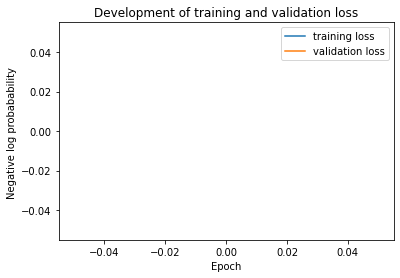

The mean squared error for this experiment is 1.0159607970714568
Creating new directory at experiments/results/10d_gp_sum_2020_06_29_15_56
Saving encoder
Saving decoder
Saving train_loss
Saving vali_loss
Saving task_mses
Saving config
Saving snapshot of the sytems


In [ ]:
run_experiment(config_file=sum_exp_config,
               experiment_name='10d_gp_sum',
              google_colab=google_colab)

##  Attention Model Experiment 

In [ ]:
aggregation_kwargs ={
      "aggregator": "BasicMLPAggregator",
      "insize": 128,
      "num_layers": 2,
      "num_neurons": 64,
      "dimout": 1
    }

In [ ]:
attention_exp_config = copy(base_config)
attention_exp_config['cnp_params']['aggregation_kwargs'] = aggregation_kwargs
attention_exp_config['train_kwargs']['batch_size_test']=1

  0%|          | 0/10 [00:00<?, ?it/s]

Training on GPU!
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=138, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=11, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
BasicMLPAggregator(
  (_process_input): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=1, bias=True)
  )
  (softmax): Softmax(dim=1)
)


 10%|█         | 1/10 [00:00<00:01,  6.81it/s]

Mean training loss at epoch 0 :                         1.445
Mean Validation loss after 0 equals                     1.511



100%|██████████| 10/10 [00:01<00:00,  6.84it/s]


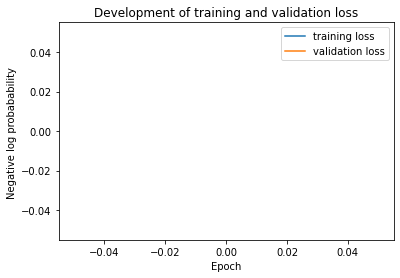

The mean squared error for this experiment is 1.0015557771921157
Creating new directory at experiments/results/10d_gp_attention_2020_06_29_15_56
Saving encoder
Saving decoder
Saving aggregator
Saving train_loss
Saving vali_loss
Saving task_mses
Saving config
Saving snapshot of the sytems


In [ ]:
run_experiment(config_file=attention_exp_config,
               experiment_name='10d_gp_attention',
              google_colab=google_colab)

##  Gated attention Model Experiment 

In [ ]:
aggregation_kwargs ={
      "aggregator": "GatedMLPAggregator",
      "insize": 128,
      "num_layers": 2,
      "num_neurons": 64,
      "dimout": 1,
      "dropout":0.2
    }